Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [73]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import sqlite3


In [76]:
#importing csv files from previous notebooks

citybike_df = pd.read_csv('C:/Taslim/LHL/Week 3 Project/citybike.csv')
#citybike_df.head()

foursquare_df = pd.read_csv('C:/Taslim/LHL/Week 3 Project/foursquare.csv')
#foursquare_df.head()


yelp_df = pd.read_csv('C:/Taslim/LHL/Week 3 Project/yelp.csv')
#yelp_df.head()


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [68]:
# Triming lat-long to increase join match
citybike_df['latitude'] = citybike_df['latitude'].round(2)
citybike_df['longitude'] = citybike_df['longitude'].round(2)

foursquare_df['latitude'] = foursquare_df['latitude'].round(2)
foursquare_df['longitude'] = foursquare_df['longitude'].round(2)

yelp_df['latitude'] = yelp_df['latitude'].round(2)
yelp_df['longitude'] = yelp_df['longitude'].round(2)


# Merting multiple dataframe
merged_df = pd.merge(citybike_df, foursquare_df, on=['latitude', 'longitude'])
merged_df2 = pd.merge(citybike_df, yelp_df, on=['latitude', 'longitude'])
merged_df3 = pd.merge(merged_df2, merged_df2, on=['latitude', 'longitude'])
merged_df3.head()


,Unnamed: 0_x_x,name_x_x,latitude,longitude,bikes_available_x,Unnamed: 0_y_x,name_y_x,rating_x,review_count_x,price_x,distance_x,Unnamed: 0_x_y,name_x_y,bikes_available_y,Unnamed: 0_y_y,name_y_y,rating_y,review_count_y,price_y,distance_y
0,89,Kendal Ave / Spadina Rd,43.67,-79.41,4,0,Uncharted Software Inc,NaN,NaN,NaN,114,89,Kendal Ave / Spadina Rd,4,0,Uncharted Software Inc,NaN,NaN,NaN,114
1,89,Kendal Ave / Spadina Rd,43.67,-79.41,4,0,Uncharted Software Inc,NaN,NaN,NaN,114,89,Kendal Ave / Spadina Rd,4,1,Uncharted Software Inc,NaN,NaN,NaN,114
2,89,Kendal Ave / Spadina Rd,43.67,-79.41,4,0,Uncharted Software Inc,NaN,NaN,NaN,114,89,Kendal Ave / Spadina Rd,4,2,Uncharted Software Inc,NaN,NaN,NaN,114
3,89,Kendal Ave / Spadina Rd,43.67,-79.41,4,0,Uncharted Software Inc,NaN,NaN,NaN,114,89,Kendal Ave / Spadina Rd,4,3,Uncharted Software Inc,NaN,NaN,NaN,114
4,89,Kendal Ave / Spadina Rd,43.67,-79.41,4,0,Uncharted Software Inc,NaN,NaN,NaN,114,89,Kendal Ave / Spadina Rd,4,4,Uncharted Software Inc,NaN,NaN,NaN,114


       Unnamed: 0_x_x      latitude     longitude  bikes_available_x  \
count    14400.000000  1.440000e+04  1.440000e+04       14400.000000   
mean       183.000000  4.367000e+01 -7.941000e+01           7.166667   
std         98.910799  2.529620e-12  2.813847e-12           5.014044   
min         89.000000  4.367000e+01 -7.941000e+01           0.000000   
25%         99.000000  4.367000e+01 -7.941000e+01           3.000000   
50%        139.000000  4.367000e+01 -7.941000e+01           7.500000   
75%        300.000000  4.367000e+01 -7.941000e+01          12.000000   
max        332.000000  4.367000e+01 -7.941000e+01          13.000000   

       Unnamed: 0_y_x  rating_x  review_count_x  price_x  distance_x  \
count    14400.000000       0.0             0.0      0.0     14400.0   
mean         9.500000       NaN             NaN      NaN       114.0   
std          5.766482       NaN             NaN      NaN         0.0   
min          0.000000       NaN             NaN      NaN       

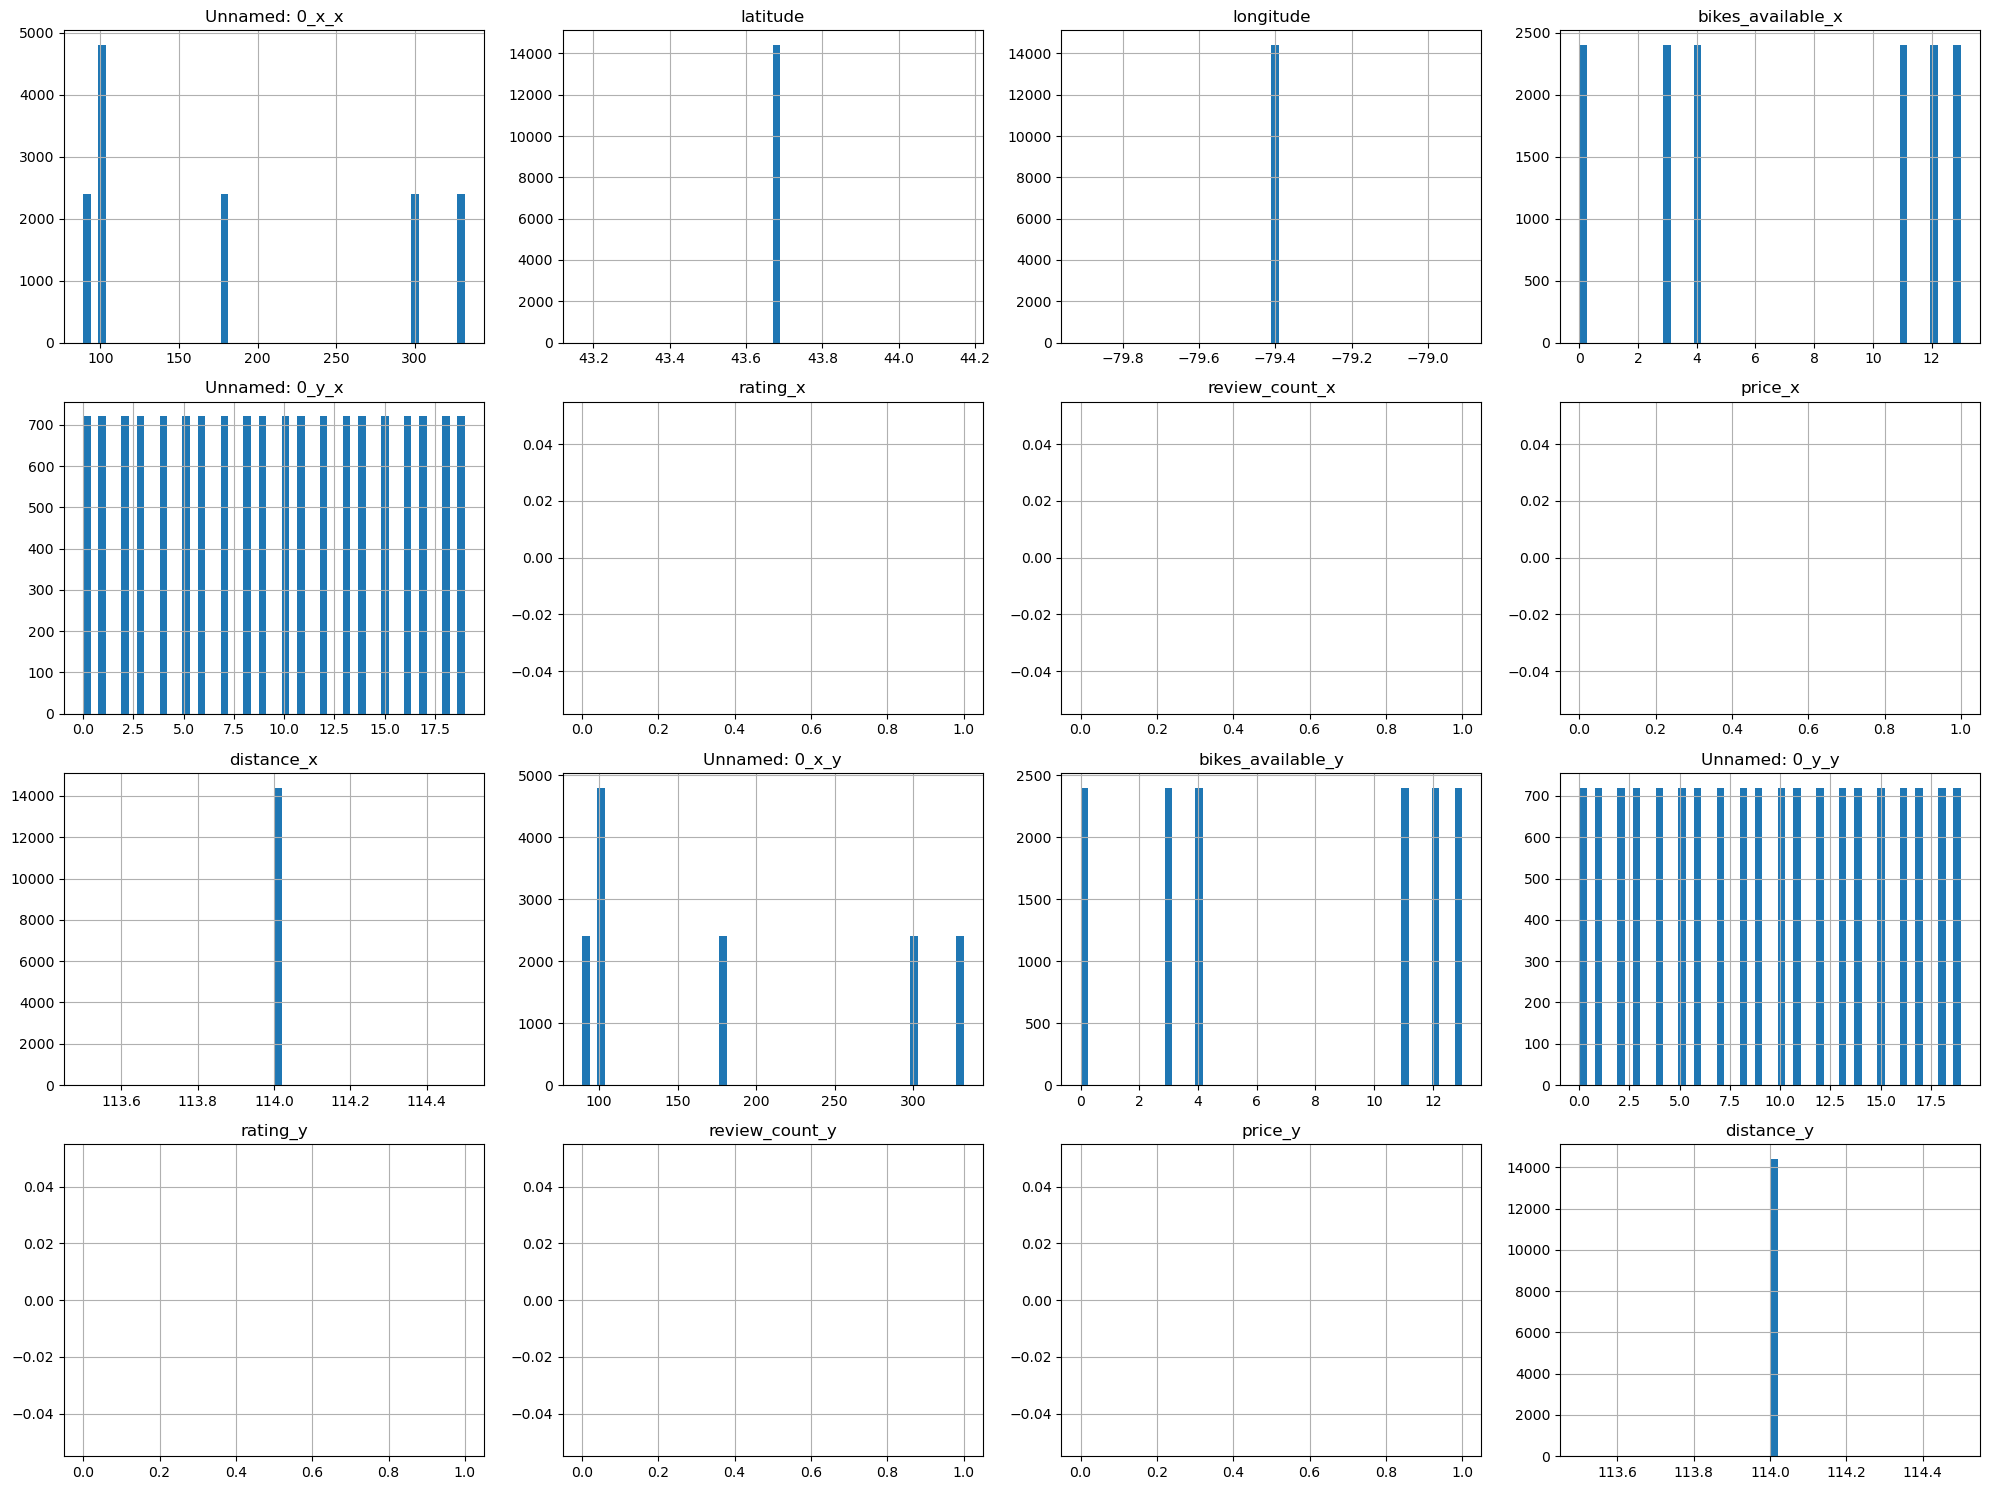

In [77]:
# Get the summary statistics of the data
print(merged_df3.describe())

# Plot histograms to visualize the distribution of each numerical column
merged_df3.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [75]:
# Connect to an SQLite database
conn = sqlite3.connect("database.sqlite")

# Store the Pandas dataframe into the SQLite database
merged_df3.to_sql("merged_data", conn, if_exists="replace")

# Close the connection to the SQLite database
conn.close()

Look at the data before and after the join to validate your data.